In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import files
uploaded = files.upload()

# Replace with the uploaded file name
# Get the actual filename from the uploaded dictionary keys
uploaded_filename = list(uploaded.keys())[0]
df = pd.read_csv(uploaded_filename)

Saving YesBankData.xlsx - Copy.csv to YesBankData.xlsx - Copy (3).csv


In [ ]:
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  # e.g., Jul-18 → 2018-07-01
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year

    print("Date conversion successful!")
except Exception as e:
    print("Error converting Date column:", e)

# STEP 3: Create 'Prev_Close' feature
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

# STEP 4: Confirm structure
print("\n📄 Final Columns:", df.columns.tolist())
print(df.head())


Date conversion successful!

📄 Final Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Month', 'Year', 'Prev_Close']
        Date   Open   High    Low  Close  Month  Year  Prev_Close
1 2005-08-01  12.58  14.88  12.55  13.42      8  2005       12.46
2 2005-09-01  13.48  14.87  12.27  13.30      9  2005       13.42
3 2005-10-01  13.20  14.47  12.40  12.99     10  2005       13.30
4 2005-11-01  13.35  13.88  12.88  13.41     11  2005       12.99
5 2005-12-01  13.49  14.44  13.00  13.71     12  2005       13.41


In [ ]:

    X = df[['Low', 'High', 'Prev_Close','Month']]
    y = df['Close']

In [ ]:
# Drop unused columns
df.drop(columns=['Month', 'Date'], inplace=True)

# Reset index and drop missing values after shifting
df.reset_index(drop=True, inplace=True)


In [ ]:
# ---------- Step 2: Feature Engineering ----------
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)


In [ ]:
# ---------- Step 4: Train-Test Split ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


In [ ]:
# ---------- Step 5: Scaling for SVM ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ---------- Step 6: Train Models ----------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [ ]:
# Random Forest
rf = RandomForestRegressor( random_state=42)
param_rfr = {'max_depth':[1,50,100,150,200],
             'n_estimators':[50,100,200]}
reg =  RandomizedSearchCV(rf,param_distributions=param_rfr,cv = 5,scoring='r2')
reg.fit(X_train, y_train)
rf_pred = reg.predict(X_test)


In [ ]:
# Support Vector Machine
svm = SVR(kernel='rbf')

params_sv = {'C':[0.1,0.2,1,2,3,10,50,100],
             'kernel':['linear','rbf'],
             'epsilon':[0.01,0.1,0.2,0.3],
             'gamma':[1,0.1,0.2,0.001,0.003]}
grid = GridSearchCV(svm,param_grid = params_sv,cv = 5)
grid.fit(X_train_scaled, y_train)
svm_pred  =grid.predict(X_test_scaled)



# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


📊 Linear Regression
MSE      : 231.0293
R2 Score : 0.9845

📊 Random Forest
MSE      : 10461.0518
R2 Score : 0.2961

📊 SVM
MSE      : 279.5881
R2 Score : 0.9812

📊 XGBoost
MSE      : 10926.2087
R2 Score : 0.2648


/tmp/ipython-input-96-1731168523.py:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


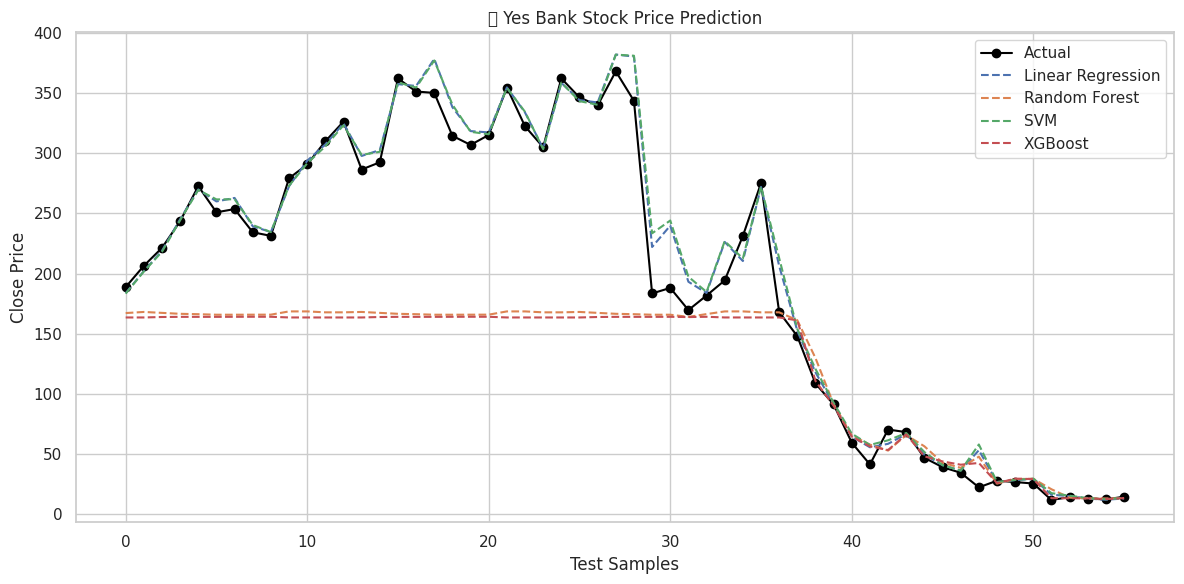

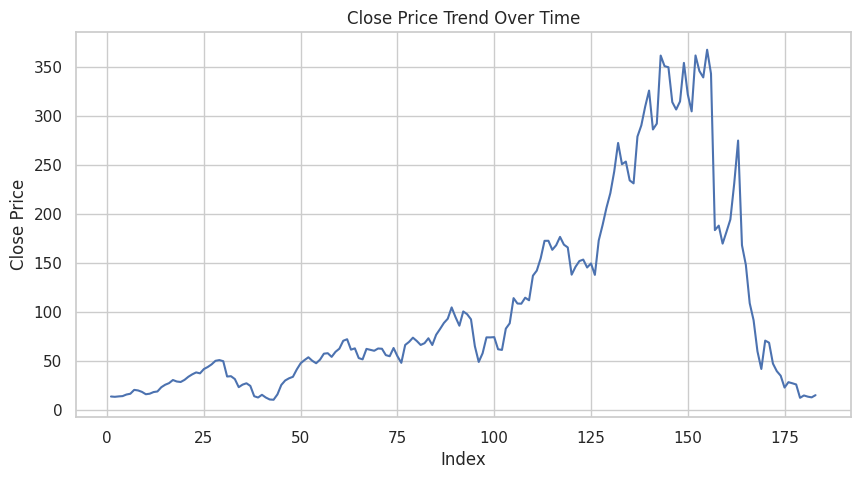

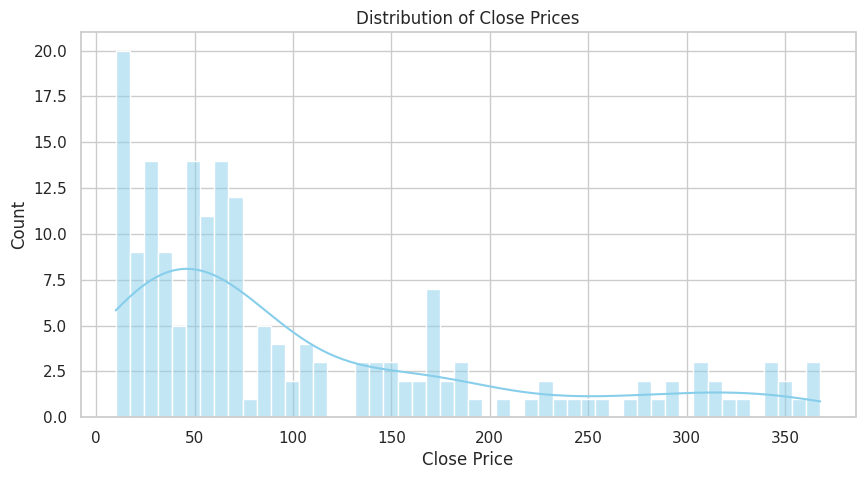

/tmp/ipython-input-96-1731168523.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.index, y='Close', data=df, palette="Set2")


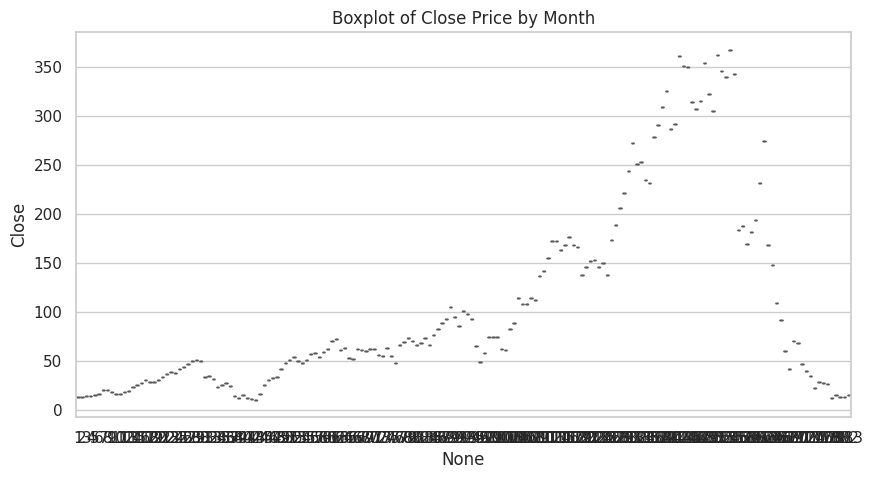

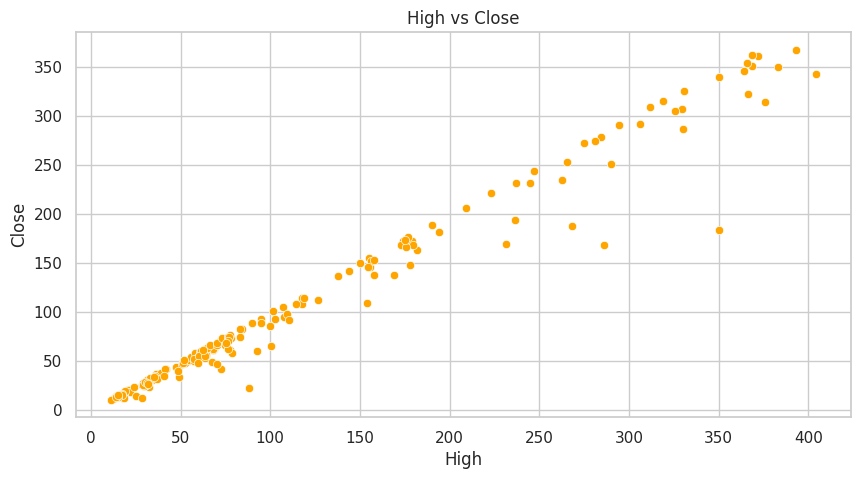

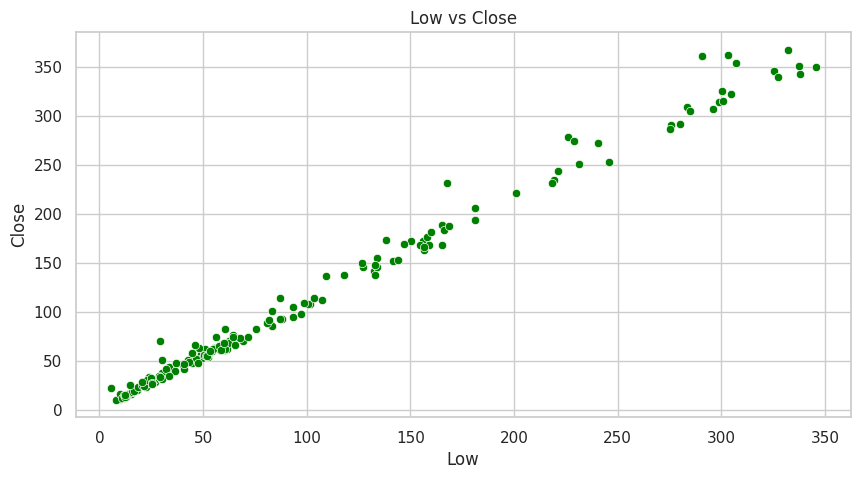

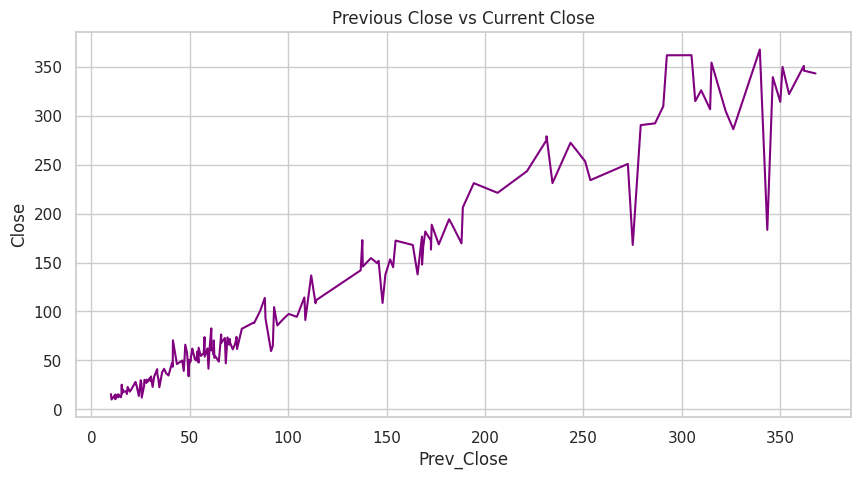

/tmp/ipython-input-96-1731168523.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Close', data=df, estimator=lambda x: sum(x)/len(x), ci=None, palette='Blues')
/tmp/ipython-input-96-1731168523.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y='Close', data=df, estimator=lambda x: sum(x)/len(x), ci=None, palette='Blues')


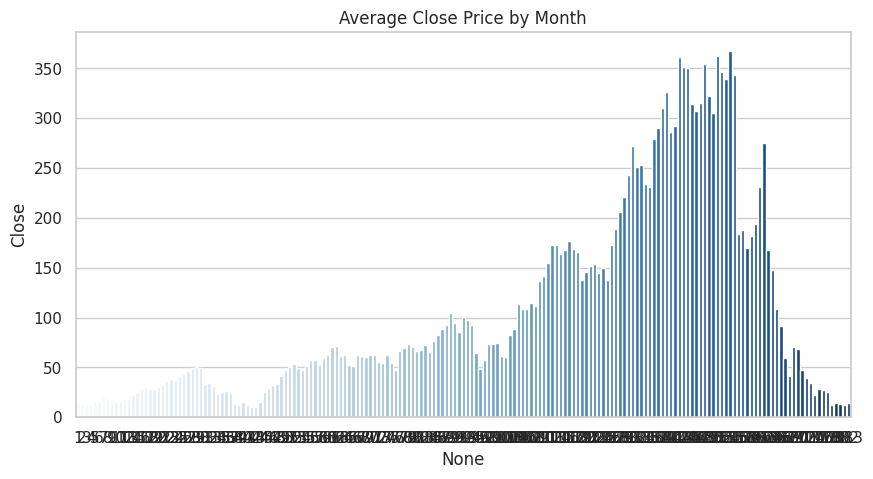

In [ ]:
# ---------- Step 7: Evaluation Function ----------
def evaluate(model_name, y_true, y_pred):
    print(f"\n📊 {model_name}")
    print("MSE      :", round(mean_squared_error(y_true, y_pred), 4))
    print("R2 Score :", round(r2_score(y_true, y_pred), 4))

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("SVM", y_test, svm_pred)
evaluate("XGBoost", y_test, xgb_pred)

# ---------- Step 8: Plot Predictions ----------
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', color='black')
plt.plot(lr_pred, label='Linear Regression', linestyle='--')
plt.plot(rf_pred, label='Random Forest', linestyle='--')
plt.plot(svm_pred, label='SVM', linestyle='--')
plt.plot(xgb_pred, label='XGBoost', linestyle='--')
plt.title("📈 Yes Bank Stock Price Prediction")
plt.xlabel("Test Samples")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- Step 9: Additional Visualizations (moved to before dropping Month) ----------
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Close Price Trend Over Time
sns.lineplot(data=df, x=df.index, y='Close')
plt.title("Close Price Trend Over Time")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()

# 2. Close Price Histogram
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Close Prices")
plt.xlabel("Close Price")
plt.show()


# 3. Boxplot of Close by Month
sns.boxplot(x=df.index, y='Close', data=df, palette="Set2")
plt.title("Boxplot of Close Price by Month")
plt.show()

# 4. Scatter Plot - High vs Close
sns.scatterplot(x='High', y='Close', data=df, color='orange')
plt.title("High vs Close")
plt.show()

# 5. Scatter Plot - Low vs Close
sns.scatterplot(x='Low', y='Close', data=df, color='green')
plt.title("Low vs Close")
plt.show()

# 6. Prev_Close vs Close (Line)
sns.lineplot(x='Prev_Close', y='Close', data=df, color='purple')
plt.title("Previous Close vs Current Close")
plt.show()

# 7. Bar Plot - Average Close by Month
sns.barplot(x=df.index, y='Close', data=df, estimator=lambda x: sum(x)/len(x), ci=None, palette='Blues')
plt.title("Average Close Price by Month")
plt.show()

